<a href="https://colab.research.google.com/github/savithrik199/DL-projects/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,Flatten
from keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
(x_tr,y_tr),(x_te,y_te)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
for i in [x_tr,y_tr,x_te,y_te]:
  print("dimension is {}".format(i.shape))

dimension is (60000, 28, 28)
dimension is (60000,)
dimension is (10000, 28, 28)
dimension is (10000,)


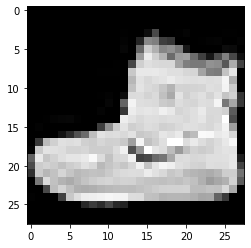

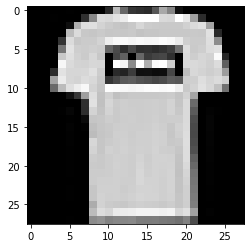

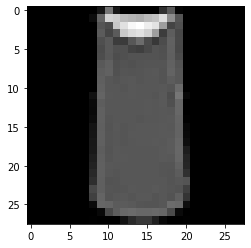

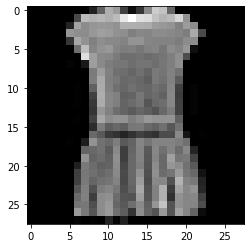

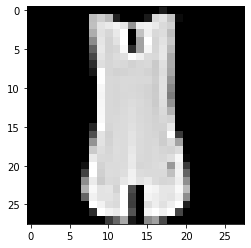

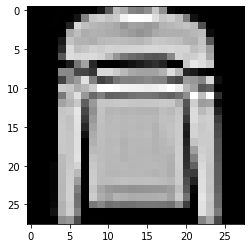

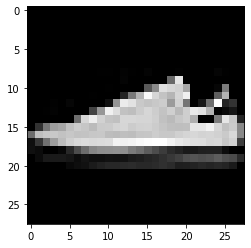

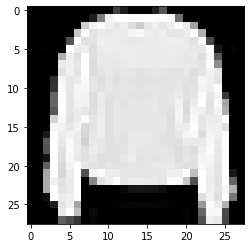

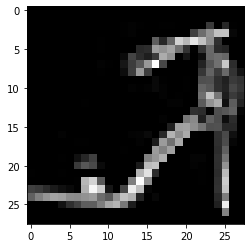

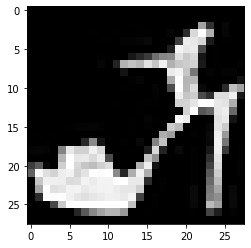

In [ ]:
for i in range(10):
  plt.subplot(331+i)
  plt.imshow(x_tr[i],cmap=plt.get_cmap("gray"))

plt.show()  
  

In [ ]:
x_tr.shape

(60000, 28, 28)

In [ ]:
x_te.shape

(10000, 28, 28)

In [ ]:
y_tr=np_utils.to_categorical(y_tr,10)
y_te=np_utils.to_categorical(y_te,10)

In [ ]:
y_te

In [ ]:
x_tr=x_tr/255
x_te=x_te/255

In [ ]:
x_tr

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
x_te

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
import keras

In [ ]:
mod=keras.Sequential([
                      keras.layers.Flatten(input_shape=(28,28)),
                      keras.layers.Dense(3000,activation="relu"),
                      keras.layers.Dense(2500,activation="relu"),
                      keras.layers.Dense(10,activation="softmax")

])

In [ ]:
mod.add(Dense(2**15,activation="tanh",input_shape=(784,)))
mod.add(Dense(2**6,activation=LeakyReLU(alpha=0.3)))
mod.add(Dense(10,activation="softmax"))

In [ ]:
mod.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               9900      
_________________________________________________________________
dense_7 (Dense)              (None, 250)              

In [ ]:
mod.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
hist=mod.fit(x_tr,y_tr,batch_size=200,epochs=20)

In [ ]:
scr=mod.evaluate(x_te,y_te)

313/313 [==============================] - 1s 2ms/step - loss: 0.2932 - accuracy: 0.9100


In [ ]:
plt.plot(hist.history["loss"])
plt.show()

In [ ]:
plt.plot(hist.history["accuracy"])
plt.show()

In [ ]:
pred=mod.predict(x_te[:11])
print(np.argmax(pred,axis=1))

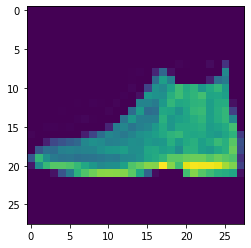

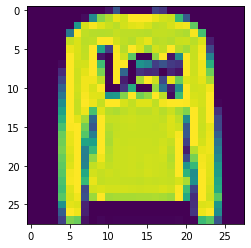

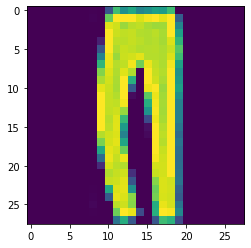

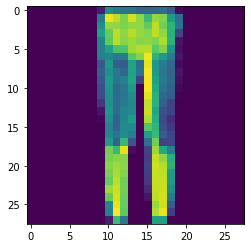

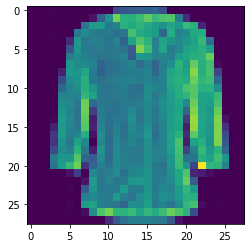

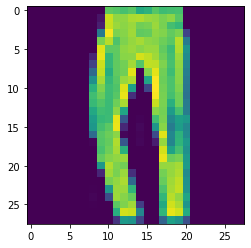

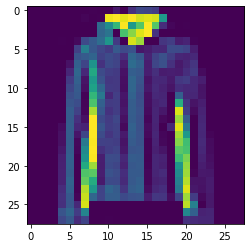

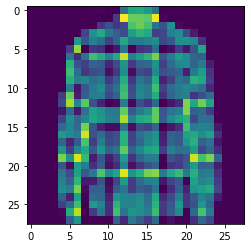

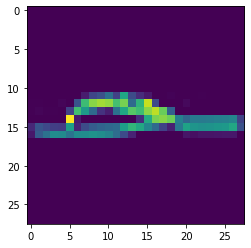

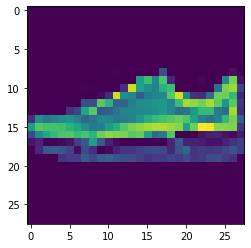

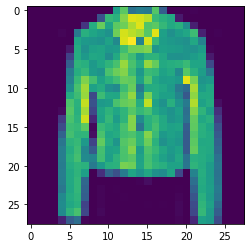

In [ ]:
for i in range(0,11):
  img=x_te[i]
  img=np.array(img,dtype="float")
  pixel=img.reshape((28,28))
  plt.imshow(pixel)
  plt.show()